Principal Component Analysis is a dimensionality-reduction technique used to reduce the dimensionality of large data sets to smaller one, by transforming a large set of variables while preserving the information all along.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15,10)

### Load the Data

In [18]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header= None)
iris.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Data Visualization

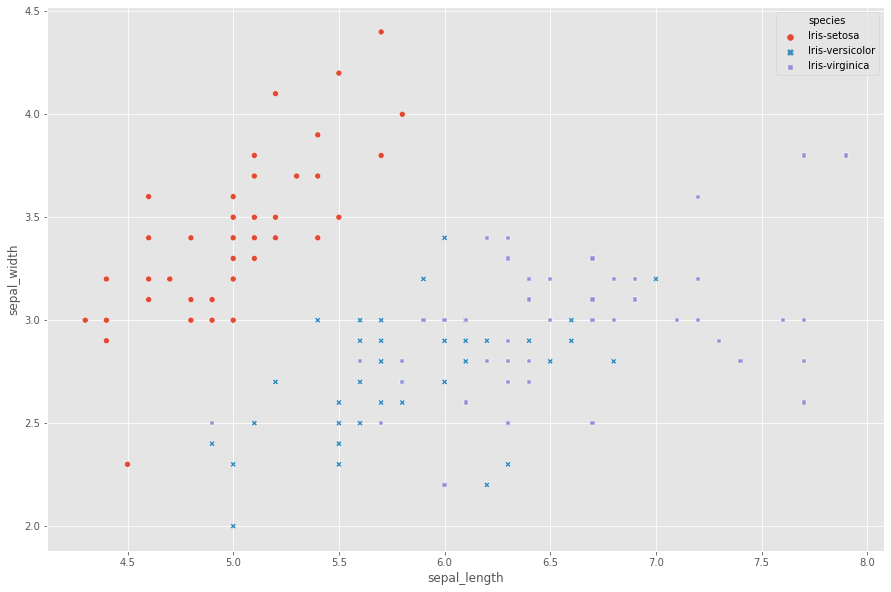

In [20]:
sns.scatterplot(x=iris.sepal_length,y=iris.sepal_width,hue=iris.species,style=iris.species)

In [21]:
X = iris.iloc[:,0:4].values
y=iris.species.values
X= StandardScaler().fit_transform(X)

### Compute the Eigenvectors and Eigenvalues

In [22]:
covariance_matrix = np.cov(X.T)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigen Values:",eigen_values)
print("Eigen Vectors:", eigen_vectors)

Eigen Values: [2.93035378 0.92740362 0.14834223 0.02074601]
Eigen Vectors: [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


### Singular Value Decomposition (SVD)

In [23]:
eigen_svd, s, v = np.linalg.svd(X.T)
eigen_svd

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

### Principle Components

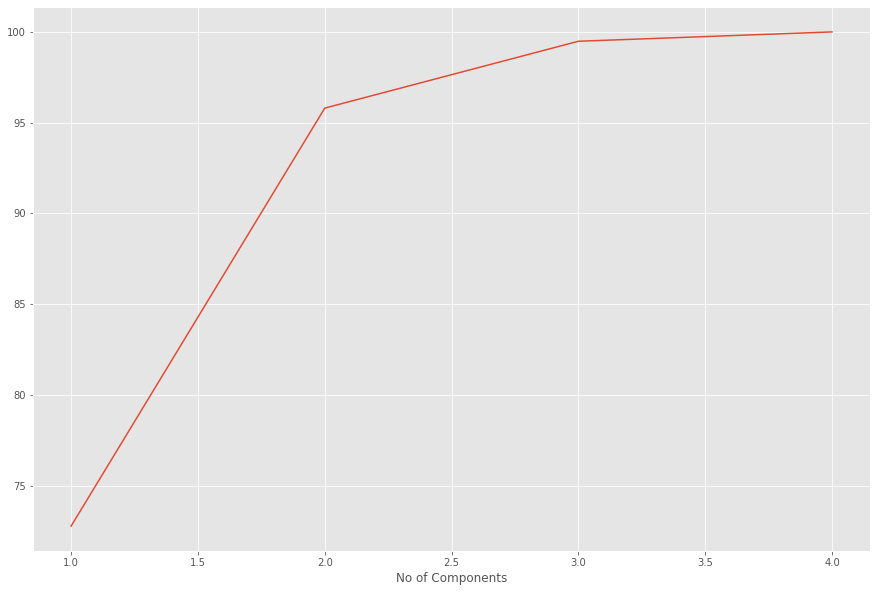

In [24]:
var_e = [(i/sum(eigen_values))*100 for i in eigen_values]
sns.lineplot(x=[1,2,3,4],y=np.cumsum(var_e))
plt.xlabel("No of Components")
plt.show()

### Plot Data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


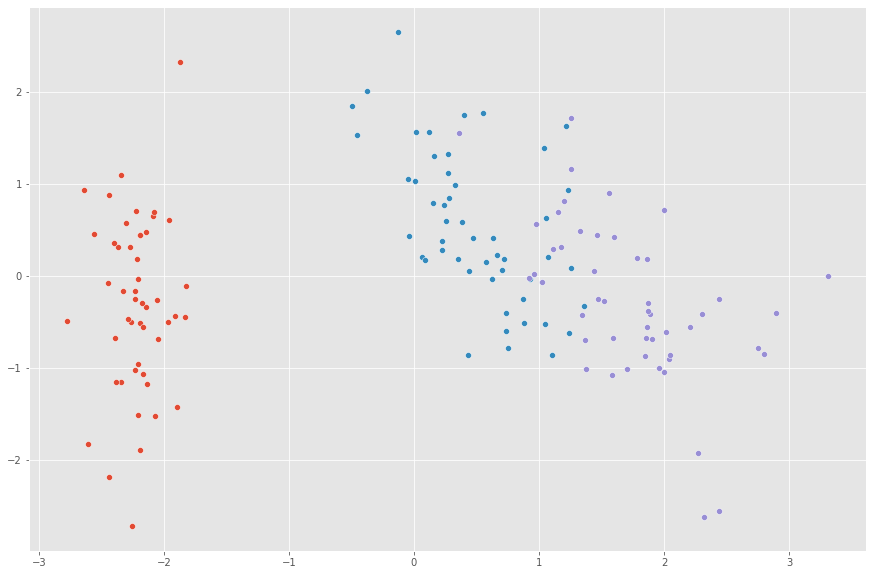

In [25]:
p_m = (eigen_vectors.T[:][:])[:2].T
X_pca = X.dot(p_m)
for species in ('Iris-setosa','Iris-versicolor','Iris-virginica'):
    sns.scatterplot(X_pca[y==species,0],
                   X_pca[y==species,1])